<a href="https://colab.research.google.com/github/raowaqas72/AI-Chatbot-for-Automated-Insights/blob/main/FIFA_and_Expo_22_Feb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

file_path = "/content/drive/MyDrive/GACA/output/GACA_Unified_Dataset_v3.csv"

df = pd.read_csv(file_path)


/tmp/ipython-input-2767380687.py:5: DtypeWarning: Columns (8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [ ]:
df.columns


Index(['Travel Year', 'Travel Month', 'Orig', 'Dest', 'Dom Opt Al', 'Opt Al 1',
       'Opt Al 2', 'Opt Al 3', 'Opt Al 4', 'Opt Al 5', 'Opt Al 6',
       'Orig Country', 'Orig Country Desc', 'Dest Country',
       'Dest Country Desc', 'Total Pax', 'Pax Share', 'Fare', 'Rev', 'Class',
       'Source_File'],
      dtype='object')

In [ ]:
df.head(5)

,Travel Year,Travel Month,Orig,Dest,Dom Opt Al,Opt Al 1,Opt Al 2,Opt Al 3,Opt Al 4,Opt Al 5,...,Orig Country,Orig Country Desc,Dest Country,Dest Country Desc,Total Pax,Pax Share,Fare,Rev,Class,Source_File
0,2020.0,2020-01-01,JED,RUH,SV,SV,NaN,NaN,NaN,NaN,...,SA,Saudi Arabia,SA,Saudi Arabia,841,0.0344,531.36,446874,FIRST,2020.xlsx
1,2020.0,2020-02-01,RUH,JED,SV,SV,NaN,NaN,NaN,NaN,...,SA,Saudi Arabia,SA,Saudi Arabia,837,0.0342,554.48,464103,FIRST,2020.xlsx
2,2020.0,2020-01-01,RUH,JED,SV,SV,NaN,NaN,NaN,NaN,...,SA,Saudi Arabia,SA,Saudi Arabia,729,0.0298,448.60,327027,FIRST,2020.xlsx
3,2020.0,2020-02-01,JED,RUH,SV,SV,NaN,NaN,NaN,NaN,...,SA,Saudi Arabia,SA,Saudi Arabia,649,0.0265,472.73,306801,FIRST,2020.xlsx
4,2020.0,2020-01-01,DXB,RUH,EK,EK,NaN,NaN,NaN,NaN,...,AE,Utd.Arab Emir.,SA,Saudi Arabia,584,0.0239,1015.10,592819,FIRST,2020.xlsx


In [ ]:
import pandas as pd
import numpy as np


In [ ]:
df = df[df["Travel Year"] != 2025]


In [ ]:
df = df.dropna(axis=1, how="all")


In [ ]:
df["Travel Type"] = np.where(
    df["Orig Country"] == df["Dest Country"],
    "Domestic",
    "International"
)


In [ ]:
df["Travel Month"] = pd.to_datetime(df["Travel Month"])


In [ ]:
df["Event_Flag"] = np.where(
    (df["Travel Month"].dt.year == 2023) &
    (df["Travel Month"].dt.month == 12) &
    (
        df["Orig"].isin(["RUH", "JED"]) |
        df["Dest"].isin(["RUH", "JED"])
    ),
    "FIFA Club World Cup 2023",
    "Normal"
)


In [ ]:
df.columns.tolist()


['Travel Year',
 'Travel Month',
 'Orig',
 'Dest',
 'Dom Opt Al',
 'Opt Al 1',
 'Opt Al 2',
 'Opt Al 3',
 'Opt Al 4',
 'Opt Al 5',
 'Opt Al 6',
 'Orig Country',
 'Orig Country Desc',
 'Dest Country',
 'Dest Country Desc',
 'Total Pax',
 'Pax Share',
 'Fare',
 'Rev',
 'Class',
 'Source_File',
 'Travel Type',
 'Event_Flag']

In [ ]:
df["Travel Type"].value_counts()


,count
Travel Type,
International,1713231
Domestic,110344


In [ ]:
df["Event_Flag"].value_counts()


,count
Event_Flag,
Normal,1798566
FIFA Club World Cup 2023,25009


In [ ]:
df[["Travel Month", "Orig", "Dest", "Event_Flag"]].head(10)


,Travel Month,Orig,Dest,Event_Flag
0,2020-01-01,JED,RUH,Normal
1,2020-02-01,RUH,JED,Normal
2,2020-01-01,RUH,JED,Normal
3,2020-02-01,JED,RUH,Normal
4,2020-01-01,DXB,RUH,Normal
5,2020-01-01,RUH,DXB,Normal
6,2020-01-01,CDG,RUH,Normal
7,2020-01-01,RUH,CDG,Normal
8,2020-03-01,RUH,JED,Normal
9,2020-03-01,JED,RUH,Normal


In [ ]:
df.head(10)

,Travel Year,Travel Month,Orig,Dest,Dom Opt Al,Opt Al 1,Opt Al 2,Opt Al 3,Opt Al 4,Opt Al 5,...,Dest Country,Dest Country Desc,Total Pax,Pax Share,Fare,Rev,Class,Source_File,Travel Type,Event_Flag
0,2020.0,2020-01-01,JED,RUH,SV,SV,NaN,NaN,NaN,NaN,...,SA,Saudi Arabia,841,0.0344,531.36,446874,FIRST,2020.xlsx,Domestic,Normal
1,2020.0,2020-02-01,RUH,JED,SV,SV,NaN,NaN,NaN,NaN,...,SA,Saudi Arabia,837,0.0342,554.48,464103,FIRST,2020.xlsx,Domestic,Normal
2,2020.0,2020-01-01,RUH,JED,SV,SV,NaN,NaN,NaN,NaN,...,SA,Saudi Arabia,729,0.0298,448.60,327027,FIRST,2020.xlsx,Domestic,Normal
3,2020.0,2020-02-01,JED,RUH,SV,SV,NaN,NaN,NaN,NaN,...,SA,Saudi Arabia,649,0.0265,472.73,306801,FIRST,2020.xlsx,Domestic,Normal
4,2020.0,2020-01-01,DXB,RUH,EK,EK,NaN,NaN,NaN,NaN,...,SA,Saudi Arabia,584,0.0239,1015.10,592819,FIRST,2020.xlsx,International,Normal
5,2020.0,2020-01-01,RUH,DXB,EK,EK,NaN,NaN,NaN,NaN,...,AE,Utd.Arab Emir.,455,0.018600000000000002,857.42,390127,FIRST,2020.xlsx,International,Normal
6,2020.0,2020-01-01,CDG,RUH,SV,SV,NaN,NaN,NaN,NaN,...,SA,Saudi Arabia,409,0.0167,2956.92,1209379,FIRST,2020.xlsx,International,Normal
7,2020.0,2020-01-01,RUH,CDG,SV,SV,NaN,NaN,NaN,NaN,...,FR,France,403,0.0165,2597.71,1046877,FIRST,2020.xlsx,International,Normal
8,2020.0,2020-03-01,RUH,JED,SV,SV,NaN,NaN,NaN,NaN,...,SA,Saudi Arabia,392,0.016,515.18,201949,FIRST,2020.xlsx,Domestic,Normal
9,2020.0,2020-03-01,JED,RUH,SV,SV,NaN,NaN,NaN,NaN,...,SA,Saudi Arabia,375,0.015300000000000001,503.89,188960,FIRST,2020.xlsx,Domestic,Normal


In [ ]:
# Expo 2030

# Event month: Oct 2030 (you can change this)

# Uplift: +26% over baseline

# Highlight: Sep–Nov 2030

# FIFA World Cup 2035

# Event month: Dec 2035

# Uplift: +133% over baseline

# Highlight:                  | Start                | End                  | Notes                         |
# | ----------------------- | -------------------- | -------------------- | ----------------------------- |
# | **Expo 2030 Riyadh**    | 1 Oct 2030           | 31 Mar 2031          | Officially confirmed          |
# | **FIFA World Cup 2034** | ~Oct 2034 (expected) | ~Nov 2034 (expected) | Final dates not yet announced |


2020-01-01 00:00:00 2024-12-01 00:00:00
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


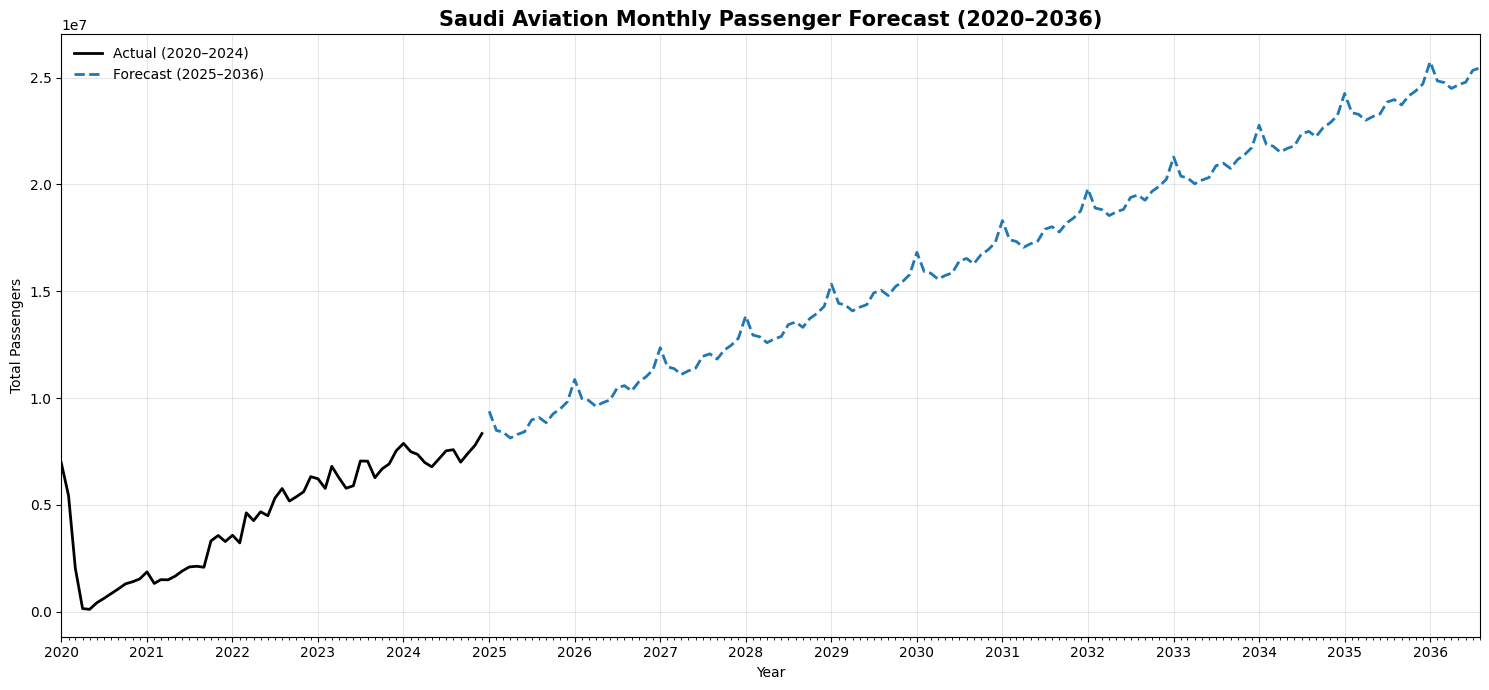

In [ ]:
# ===============================
# 1. Libraries
# ===============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from statsmodels.tsa.holtwinters import ExponentialSmoothing


# ===============================
# 2. Prepare Monthly Time Series
# ===============================

# Ensure datetime
df["Travel Month"] = pd.to_datetime(df["Travel Month"])

# Aggregate to monthly passengers
monthly_df = (
    df.groupby(pd.Grouper(key="Travel Month", freq="MS"))["Total Pax"]
      .sum()
      .sort_index()
)

# Explicitly set monthly frequency (metadata only)
monthly_df = monthly_df.asfreq("MS")

# Sanity check
print(monthly_df.index.min(), monthly_df.index.max())
print(type(monthly_df.index))


# ===============================
# 3. Train Forecast Model
# ===============================

model = ExponentialSmoothing(
    monthly_df,
    trend="add",
    seasonal="add",
    seasonal_periods=12
)

model_fit = model.fit()


# ===============================
# 4. Forecast to 2036
# ===============================

forecast_steps = 140  # ~ Jan-2025 to Aug-2036
forecast_values = model_fit.forecast(forecast_steps)

forecast_index = pd.date_range(
    start=monthly_df.index[-1],
    periods=forecast_steps + 1,
    freq="MS"
)[1:]

forecast = pd.Series(forecast_values.values, index=forecast_index)


# ===============================
# 5. Plot (FIXED AXIS & ALIGNMENT)
# ===============================

fig, ax = plt.subplots(figsize=(15,7))

# Actuals
ax.plot(
    monthly_df.index,
    monthly_df.values,
    label="Actual (2020–2024)",
    linewidth=2,
    color="black"
)

# Forecast
ax.plot(
    forecast.index,
    forecast.values,
    label="Forecast (2025–2036)",
    linestyle="--",
    linewidth=2,
    color="tab:blue"
)

# ----- X-axis formatting (KEY FIX) -----
ax.xaxis.set_major_locator(mdates.YearLocator(1))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
ax.xaxis.set_minor_locator(mdates.MonthLocator())

ax.set_xlim(
    monthly_df.index.min(),
    forecast.index.max()
)

# Labels & style
ax.set_title(
    "Saudi Aviation Monthly Passenger Forecast (2020–2036)",
    fontsize=15,
    weight="bold"
)
ax.set_xlabel("Year")
ax.set_ylabel("Total Passengers")
ax.legend(frameon=False)
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()


In [ ]:
# ===============================
# 6. Mega-Event Scenario Assumptions
# ===============================

# # --- Expo 2030 assumptions ---
# expo_month = pd.Timestamp("2030-10-01")   # Event month
# expo_uplift = 0.26                         # +26% uplift
# expo_window = pd.date_range(
#     "2030-09-01", "2030-11-01", freq="MS"  # Sep–Nov 2030
# )

# # --- FIFA World Cup 2035 assumptions ---
# fifa_month = pd.Timestamp("2035-12-01")   # Event month
# fifa_uplift = 1.33/6                         # +133% uplift for Year for 2month divide by6
# fifa_window = pd.date_range(
#     "2035-11-01", "2036-01-01", freq="MS"  # Nov 2035 – Jan 2036
# )
# ===============================
# 6. Mega-Event Scenario Assumptions
# ===============================

# --- Expo 2030 assumptions ---
# Official event period: 1 Oct 2030 – 31 Mar 2031
expo_month = pd.Timestamp("2030-12-01")   # Mid-event reference month
expo_uplift = 0.26                        # +26% uplift
expo_window = pd.date_range(
    "2030-10-01", "2031-03-01", freq="MS"  # Oct 2030 – Mar 2031
)

# --- FIFA World Cup 2034 assumptions ---
# Expected window: Oct–Nov 2034 (final dates TBD)
fifa_month = pd.Timestamp("2034-11-01")   # Peak event month
fifa_uplift = 1.33 / 6                    # +133% annual uplift spread across 2 months
fifa_window = pd.date_range(
    "2034-10-01", "2034-11-01", freq="MS"  # Oct–Nov 2034
)



In [ ]:
# ===============================
# 7. Scenario Construction
# ===============================

# Base scenario table
scenario_df = forecast.to_frame(name="Baseline")
print(scenario_df)
# Start scenarios equal to baseline
scenario_df["Expo_2030"] = scenario_df["Baseline"]
scenario_df["FIFA_2034"] = scenario_df["Baseline"]

# Apply Expo uplift ONLY during event window
scenario_df.loc[
    scenario_df.index.isin(expo_window),
    "Expo_2030"
] = scenario_df.loc[
    scenario_df.index.isin(expo_window),
    "Baseline"
] * (1 + expo_uplift)
scenario_df["FIFA_2034"] = scenario_df["Baseline"]

scenario_df.loc[
    scenario_df.index.isin(fifa_window),
    "FIFA_2034"
] = scenario_df.loc[
    scenario_df.index.isin(fifa_window),
    "Baseline"
] * (1 + fifa_uplift)

# # Apply FIFA uplift ONLY during event window
# scenario_df.loc[
#     scenario_df.index.isin(fifa_window),
#     "FIFA_2035"
# ] = scenario_df.loc[
#     scenario_df.index.isin(fifa_window),
#     "Baseline"
# ] * (1 + fifa_uplift)


                Baseline
2025-01-01  9.378919e+06
2025-02-01  8.481396e+06
2025-03-01  8.404508e+06
2025-04-01  8.127098e+06
2025-05-01  8.295748e+06
...                  ...
2036-04-01  2.449263e+07
2036-05-01  2.466128e+07
2036-06-01  2.478603e+07
2036-07-01  2.533926e+07
2036-08-01  2.545888e+07

[140 rows x 1 columns]


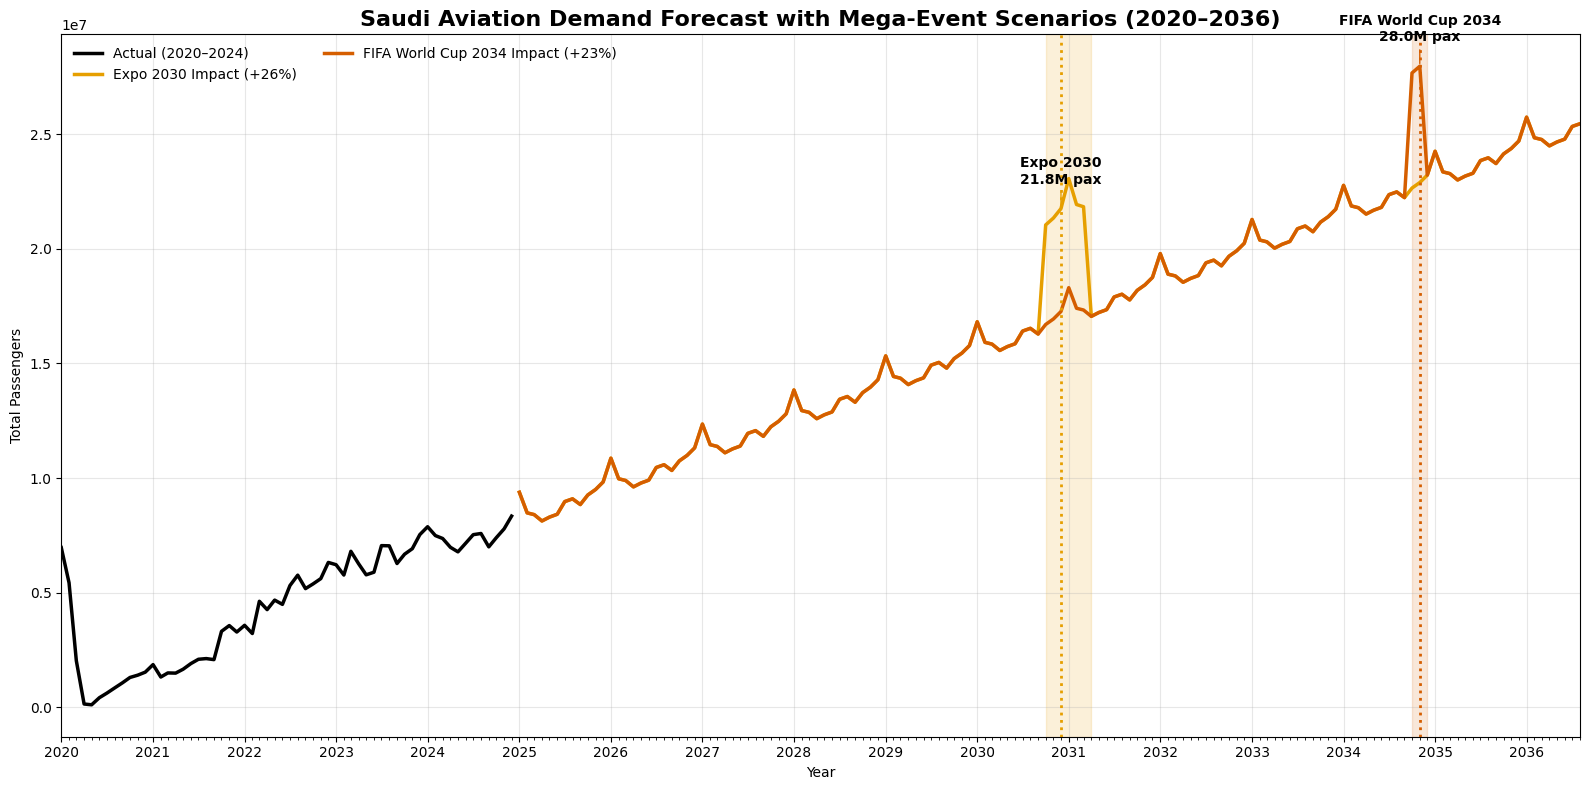

In [ ]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(16,8))

# -------------------------------
# Actuals
# -------------------------------
ax.plot(
    monthly_df.index,
    monthly_df.values,
    label="Actual (2020–2024)",
    color="black",
    linewidth=2.5
)

# -------------------------------
# Baseline Forecast
# -------------------------------
# ax.plot(
#     scenario_df.index,
#     scenario_df["Baseline"],
#     label="Baseline Forecast",
#     linestyle="--",
#     linewidth=2,
#     color="gray"
# )

# -------------------------------
# Expo 2030 Scenario
# -------------------------------
ax.plot(
    scenario_df.index,
    scenario_df["Expo_2030"],
    label="Expo 2030 Impact (+26%)",
    linewidth=2.5,
    color="#E69F00"
)

# -------------------------------
# FIFA 2035 Scenario
# -------------------------------
ax.plot(
    scenario_df.index,
    scenario_df["FIFA_2034"],
    label="FIFA World Cup 2034 Impact (+23%)",
    linewidth=2.5,
    color="#D55E00"
)
# -------------------------------
# Highlight Event Windows (FIXED)
# -------------------------------

# Expo: extend to end of March 2031
expo_start = expo_window.min()
expo_end = expo_window.max() + pd.offsets.MonthEnd(1)

# FIFA: extend to end of Nov 2034
fifa_start = fifa_window.min()
fifa_end = fifa_window.max() + pd.offsets.MonthEnd(1)

ax.axvspan(
    expo_start, expo_end,
    color="#E69F00", alpha=0.15
)

ax.axvspan(
    fifa_start, fifa_end,
    color="#D55E00", alpha=0.15
)

# -------------------------------
# # Highlight Event Windows
# # -------------------------------
# ax.axvspan(
#     expo_window.min(), expo_window.max(),
#     color="#E69F00", alpha=0.15
# )

# ax.axvspan(
#     fifa_window.min(), fifa_window.max(),
#     color="#D55E00", alpha=0.15
# )

# -------------------------------
# Event Markers
# -------------------------------
ax.axvline(expo_month, linestyle=":", linewidth=2, color="#E69F00")
ax.axvline(fifa_month, linestyle=":", linewidth=2, color="#D55E00")

# -------------------------------
# Annotations (SAFE & CLEAN)
# -------------------------------
expo_peak = scenario_df.loc[expo_month, "Expo_2030"]
fifa_peak = scenario_df.loc[fifa_month, "FIFA_2034"]

ax.annotate(
    f"Expo 2030\n{expo_peak/1e6:.1f}M pax",
    xy=(expo_month, expo_peak),
    xytext=(0, 18),
    textcoords="offset points",
    ha="center",
    fontsize=10,
    weight="bold",
    arrowprops=dict(arrowstyle="-", color="#E69F00")
)

ax.annotate(
    f"FIFA World Cup 2034\n{fifa_peak/1e6:.1f}M pax",
    xy=(fifa_month, fifa_peak),
    xytext=(0, 18),
    textcoords="offset points",
    ha="center",
    fontsize=10,
    weight="bold",
    arrowprops=dict(arrowstyle="-", color="#D55E00")
)

# -------------------------------
# Axis Formatting (CRITICAL FIX)
# -------------------------------
ax.xaxis.set_major_locator(mdates.YearLocator(1))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
ax.xaxis.set_minor_locator(mdates.MonthLocator())

ax.set_xlim(
    monthly_df.index.min(),
    scenario_df.index.max()
)

# -------------------------------
# Titles & Styling
# -------------------------------
ax.set_title(
    "Saudi Aviation Demand Forecast with Mega-Event Scenarios (2020–2036)",
    fontsize=16,
    weight="bold"
)

ax.set_xlabel("Year")
ax.set_ylabel("Total Passengers")
ax.legend(frameon=False, ncol=2)
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()


In [ ]:
# # -------------------------------
# # Implied baseline calculations
# # -------------------------------

# expo_event_value = scenario_df.loc[expo_month, "Expo_2030"]
# fifa_event_value = scenario_df.loc[fifa_month, "FIFA_2035"]

# expo_base_implied = expo_event_value / 1.26
# fifa_base_implied = fifa_event_value / 2.33

# expo_event_value, expo_base_implied, fifa_event_value, fifa_base_implied


In [ ]:
# print(f"Expo 2030:")
# print(f"  Event passengers : {expo_event_value/1e6:.1f}M")
# print(f"  Implied baseline : {expo_base_implied/1e6:.1f}M")
# print(f"  Incremental gain : {(expo_event_value - expo_base_implied)/1e6:.1f}M")

# print("\nFIFA World Cup 2035:")
# print(f"  Event passengers : {fifa_event_value/1e6:.1f}M")
# print(f"  Implied baseline : {fifa_base_implied/1e6:.1f}M")
# print(f"  Incremental gain : {(fifa_event_value - fifa_base_implied)/1e6:.1f}M")


In [ ]:
# # -------------------------------
# # Uplift % calculation
# # -------------------------------

# expo_uplift_pct = (expo_event_value - expo_base_implied) / expo_base_implied * 100
# fifa_uplift_pct = (fifa_event_value - fifa_base_implied) / fifa_base_implied * 100

# expo_uplift_pct, fifa_uplift_pct


In [ ]:
# print(f"Expo 2030 Uplift:")
# print(f"  Baseline demand : {expo_base_implied/1e6:.1f}M pax")
# print(f"  Event demand    : {expo_event_value/1e6:.1f}M pax")
# print(f"  Uplift          : {expo_uplift_pct:.0f}%")

# print("\nFIFA World Cup 2035 Uplift:")
# print(f"  Baseline demand : {fifa_base_implied/1e6:.1f}M pax")
# print(f"  Event demand    : {fifa_event_value/1e6:.1f}M pax")
# print(f"  Uplift          : {fifa_uplift_pct:.0f}%")


In [ ]:
# # Same-month prior year comparison
# expo_compare_month = pd.Timestamp("2029-10-01")
# fifa_compare_month = pd.Timestamp("2034-12-01")


In [ ]:
# # Expo values
# expo_2030_event = scenario_df.loc[expo_month, "Expo_2030"]
# expo_2029_base  = scenario_df.loc[expo_compare_month, "Baseline"]

# # FIFA values
# fifa_2035_event = scenario_df.loc[fifa_month, "FIFA_2035"]
# fifa_2034_base  = scenario_df.loc[fifa_compare_month, "Baseline"]


In [ ]:
# expo_uplift_vs_2029 = (expo_2030_event - expo_2029_base) / expo_2029_base * 100
# fifa_uplift_vs_2034 = (fifa_2035_event - fifa_2034_base) / fifa_2034_base * 100


In [ ]:
# print("Expo 2030 (vs Oct 2029):")
# print(f"  Oct 2029 baseline : {expo_2029_base/1e6:.1f}M pax")
# print(f"  Oct 2030 event    : {expo_2030_event/1e6:.1f}M pax")
# print(f"  Uplift vs 2029    : {expo_uplift_vs_2029:.1f}%")

# print("\nFIFA World Cup 2035 (vs Dec 2034):")
# print(f"  Dec 2034 baseline : {fifa_2034_base/1e6:.1f}M pax")
# print(f"  Dec 2035 event    : {fifa_2035_event/1e6:.1f}M pax")
# print(f"  Uplift vs 2034    : {fifa_uplift_vs_2034:.1f}%")


In [ ]:
# uplift_yoy_summary = pd.DataFrame({
#     "Event": ["Expo 2030", "FIFA World Cup 2035"],
#     "Prior_Year_Month": ["Oct 2029", "Dec 2034"],
#     "Prior_Year_Pax_M": [
#         expo_2029_base / 1e6,
#         fifa_2034_base / 1e6
#     ],
#     "Event_Year_Pax_M": [
#         expo_2030_event / 1e6,
#         fifa_2035_event / 1e6
#     ],
#     "YoY_Uplift_%": [
#         expo_uplift_vs_2029,
#         fifa_uplift_vs_2034
#     ]
# })

# uplift_yoy_summary


In [ ]:
# Domestic vs International

In [ ]:
# Step 1: Classify Domestic vs International (Actuals)

In [ ]:
# df = df.copy()

# df["Travel Month"] = pd.to_datetime(df["Travel Month"])

# df["Travel_Type"] = np.where(
#     (df["Orig Country"] == "SA") & (df["Dest Country"] == "SA"),
#     "Domestic",
#     "International"
# )


In [ ]:
# STEP 1 — Data preparation & classification

In [ ]:
df = df.copy()

df["Travel Month"] = pd.to_datetime(df["Travel Month"])

# Classify passenger type
df["Passenger_Type"] = np.where(
    (df["Orig Country"] == "SA") & (df["Dest Country"] == "SA"),
    "Domestic",
    "International"
)


In [ ]:
# STEP 2 — Build historical MONTHLY time series (2020–2024)

In [ ]:
# monthly_ts = (
#     df
#     .groupby([pd.Grouper(key="Travel Month", freq="MS"), "Passenger_Type"])
#     .agg({"Total Pax": "sum"})
#     .reset_index()
# )

# monthly_ts = monthly_ts.pivot(
#     index="Travel Month",
#     columns="Passenger_Type",
#     values="Total Pax"
# ).fillna(0)

# monthly_ts = monthly_ts.locx


AttributeError: 'DataFrame' object has no attribute 'locx'

In [ ]:
#STEP 3 — Model & forecast Domestic passengers (base demand)

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Time index
t_dom = np.arange(len(monthly_ts)).reshape(-1, 1)

dom_model = LinearRegression()
dom_model.fit(t_dom, monthly_ts["Domestic"].values)

# Forecast horizon = length of scenario_df
t_future = np.arange(
    len(monthly_ts),
    len(monthly_ts) + len(scenario_df)
).reshape(-1, 1)

scenario_df["Domestic_Base"] = dom_model.predict(t_future)
scenario_df["Domestic_Base"] = scenario_df["Domestic_Base"].clip(lower=0)


In [ ]:
# STEP 4 — Model & forecast International passengers (base demand)

In [ ]:
t_int = np.arange(len(monthly_ts)).reshape(-1, 1)

int_model = LinearRegression()
int_model.fit(t_int, monthly_ts["International"].values)

scenario_df["International_Base"] = int_model.predict(t_future)
scenario_df["International_Base"] = scenario_df["International_Base"].clip(lower=0)


In [ ]:
# STEP 5 — Apply Expo & FIFA impact as MULTIPLICATIVE FACTORS (event months only)

In [ ]:

expo_window = pd.date_range("2030-10-01", "2031-03-31", freq="MS")
fifa_window = pd.date_range("2034-10-01", "2034-11-30", freq="MS")
scenario_df["Domestic_Event"] = scenario_df["Domestic_Base"]
scenario_df["International_Event"] = scenario_df["International_Base"]

# Expo 2030 impact
scenario_df.loc[expo_window, "International_Event"] *= 1.26
scenario_df.loc[expo_window, "Domestic_Event"] *= 1.10

# FIFA 2034 impact
scenario_df.loc[fifa_window, "International_Event"] *= 1.23
scenario_df.loc[fifa_window, "Domestic_Event"] *= 1.05


In [ ]:
# STEP 6 — Derive totals & percentages (ONLY AFTER modelling)

In [ ]:
scenario_df["Total_Pax"] = (
    scenario_df["Domestic_Event"] +
    scenario_df["International_Event"]
)

scenario_df["Domestic_%"] = (
    scenario_df["Domestic_Event"] / scenario_df["Total_Pax"] * 100
)

scenario_df["International_%"] = (
    scenario_df["International_Event"] / scenario_df["Total_Pax"] * 100
)


In [ ]:
summary_pct = pd.DataFrame({
    "Scenario": ["Baseline", "Expo 2030", "FIFA 2034"],
    "Domestic (%)": [
        scenario_df["Domestic_Base"].mean() /
        (scenario_df["Domestic_Base"] + scenario_df["International_Base"]).mean() * 100,

        scenario_df.loc[expo_window, "Domestic_Event"].mean() /
        scenario_df.loc[expo_window, "Total_Pax"].mean() * 100,

        scenario_df.loc[fifa_window, "Domestic_Event"].mean() /
        scenario_df.loc[fifa_window, "Total_Pax"].mean() * 100,
    ],
    "International (%)": [
        scenario_df["International_Base"].mean() /
        (scenario_df["Domestic_Base"] + scenario_df["International_Base"]).mean() * 100,

        scenario_df.loc[expo_window, "International_Event"].mean() /
        scenario_df.loc[expo_window, "Total_Pax"].mean() * 100,

        scenario_df.loc[fifa_window, "International_Event"].mean() /
        scenario_df.loc[fifa_window, "Total_Pax"].mean() * 100,
    ]
})


In [ ]:
print(summary_pct)


    Scenario  Domestic (%)  International (%)
0   Baseline     25.547777          74.452223
1  Expo 2030     23.007005          76.992995
2  FIFA 2034     21.866759          78.133241


In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt

# # X locations
# x = np.arange(len(summary_pct["Scenario"]))
# width = 0.35

# fig, ax = plt.subplots(figsize=(10, 6))

# # Domestic bars
# bars_dom = ax.bar(
#     x - width/2,
#     summary_pct["Domestic (%)"].values,
#     width,
#     label="Domestic",
# )

# # International bars
# bars_int = ax.bar(
#     x + width/2,
#     summary_pct["International (%)"].values,
#     width,
#     label="International",
# )

# # Axis formatting
# ax.set_xticks(x)
# ax.set_xticklabels(summary_pct["Scenario"])
# ax.set_ylabel("Passenger Share (%)")
# ax.set_ylim(0, 100)

# ax.set_title(
#     "Domestic vs International Passenger Composition\nBaseline vs Expo 2030 vs FIFA 2034",
#     fontsize=14,
#     weight="bold"
# )

# ax.legend(frameon=False)
# ax.grid(axis="y", alpha=0.3)

# # -----------------------
# # ADD DATA LABELS (WHITE)
# # -----------------------
# def add_labels(bars):
#     for bar in bars:
#         height = bar.get_height()
#         ax.text(
#             bar.get_x() + bar.get_width() / 2,
#             height / 2,                      # center of bar
#             f"{height:.1f}%",
#             ha="center",
#             va="center",
#             fontsize=10,
#             color="white",
#             weight="bold"
#         )

# add_labels(bars_dom)
# add_labels(bars_int)

# plt.tight_layout()
# plt.show()


NameError: name 'summary_pct' is not defined

In [ ]:
# .Airfare Forecasting

In [ ]:
# Step 1: Compute ACTUAL baseline (2020–2024)

In [ ]:
# -----------------------------------------
# ACTUAL BASELINE: 2020–2024 historical avg
# -----------------------------------------
baseline_period = monthly_ts.loc["2020-01-01":"2024-12-01"]

baseline_domestic_avg = baseline_period["Domestic"].mean()
baseline_international_avg = baseline_period["International"].mean()

baseline_total_avg = baseline_domestic_avg + baseline_international_avg

baseline_domestic_pct = baseline_domestic_avg / baseline_total_avg * 100
baseline_international_pct = baseline_international_avg / baseline_total_avg * 100


In [ ]:
expo_domestic_pct = (
    scenario_df.loc[expo_window, "Domestic_Event"].mean() /
    scenario_df.loc[expo_window, "Total_Pax"].mean() * 100
)

expo_international_pct = (
    scenario_df.loc[expo_window, "International_Event"].mean() /
    scenario_df.loc[expo_window, "Total_Pax"].mean() * 100
)

fifa_domestic_pct = (
    scenario_df.loc[fifa_window, "Domestic_Event"].mean() /
    scenario_df.loc[fifa_window, "Total_Pax"].mean() * 100
)

fifa_international_pct = (
    scenario_df.loc[fifa_window, "International_Event"].mean() /
    scenario_df.loc[fifa_window, "Total_Pax"].mean() * 100
)


In [ ]:
summary_pct = pd.DataFrame({
    "Scenario": [
        "Actual Avg (2020–2024)",
        "Expo 2030",
        "FIFA 2034"
    ],
    "Domestic (%)": [
        baseline_domestic_pct,
        expo_domestic_pct,
        fifa_domestic_pct
    ],
    "International (%)": [
        baseline_international_pct,
        expo_international_pct,
        fifa_international_pct
    ]
})


In [ ]:
# -----------------------------
# ACTUAL (2020–2024)
# -----------------------------
actual_domestic = baseline_period["Domestic"].mean()
actual_international = baseline_period["International"].mean()

# -----------------------------
# EXPO 2030 (event window)
# -----------------------------
expo_domestic = scenario_df.loc[expo_window, "Domestic_Event"].mean()
expo_international = scenario_df.loc[expo_window, "International_Event"].mean()

# -----------------------------
# FIFA 2034 (event window)
# -----------------------------
fifa_domestic = scenario_df.loc[fifa_window, "Domestic_Event"].mean()
fifa_international = scenario_df.loc[fifa_window, "International_Event"].mean()


In [ ]:
plot_df = pd.DataFrame({
    "Period": [
        "Actual Avg\n(2020–2024)",
        "Expo 2030",
        "FIFA 2034"
    ],
    "Domestic": [
        actual_domestic,
        expo_domestic,
        fifa_domestic
    ],
    "International": [
        actual_international,
        expo_international,
        fifa_international
    ]
})


In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np

# x = np.arange(len(plot_df))
# width = 0.35

# fig, ax = plt.subplots(figsize=(11, 6))

# bars_dom = ax.bar(
#     x - width/2,
#     plot_df["Domestic"],
#     width,
#     label="Domestic"
# )

# bars_int = ax.bar(
#     x + width/2,
#     plot_df["International"],
#     width,
#     label="International"
# )

# # -----------------------------
# # Formatting
# # -----------------------------
# ax.set_xticks(x)
# ax.set_xticklabels(plot_df["Period"])
# ax.set_ylabel("Average Monthly Passengers")
# ax.set_title(
#     "Domestic vs International Passenger Volumes\nActual vs Expo 2030 vs FIFA 2034",
#     fontsize=14,
#     weight="bold"
# )

# ax.legend(frameon=False)
# ax.grid(axis="y", alpha=0.3)

# # -----------------------------
# # Value labels (inside bars)
# # -----------------------------
# def add_labels(bars):
#     for bar in bars:
#         height = bar.get_height()
#         ax.text(
#             bar.get_x() + bar.get_width() / 2,
#             height * 0.5,
#             f"{height:,.0f}",
#             ha="center",
#             va="center",
#             fontsize=10,
#             color="white",
#             weight="bold"
#         )

# add_labels(bars_dom)
# add_labels(bars_int)

# plt.tight_layout()
# plt.show()


In [ ]:
# --------------------------------
# Convert to percentage shares
# --------------------------------
plot_pct_df = pd.DataFrame({
    "Period": [
        "Actual Avg\n(2020–2024)",
        "Expo 2030",
        "FIFA 2034"
    ],
    "Domestic (%)": [
        actual_domestic / (actual_domestic + actual_international) * 100,
        expo_domestic / (expo_domestic + expo_international) * 100,
        fifa_domestic / (fifa_domestic + fifa_international) * 100
    ],
    "International (%)": [
        actual_international / (actual_domestic + actual_international) * 100,
        expo_international / (expo_domestic + expo_international) * 100,
        fifa_international / (fifa_domestic + fifa_international) * 100
    ]
})


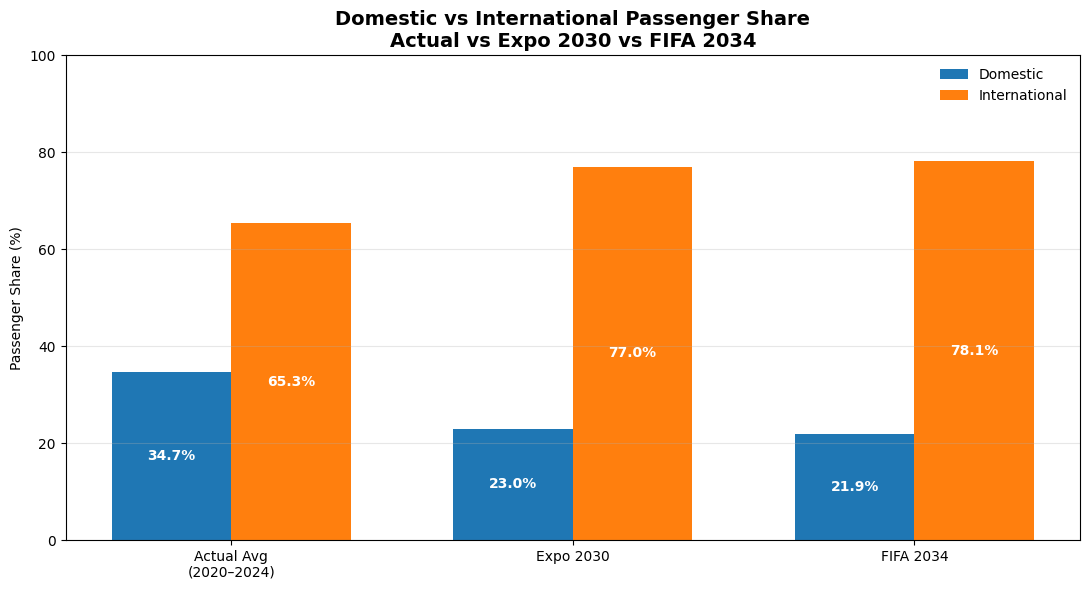

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(len(plot_pct_df))
width = 0.35

fig, ax = plt.subplots(figsize=(11, 6))

bars_dom = ax.bar(
    x - width/2,
    plot_pct_df["Domestic (%)"],
    width,
    label="Domestic"
)

bars_int = ax.bar(
    x + width/2,
    plot_pct_df["International (%)"],
    width,
    label="International"
)

# -----------------------------
# Formatting
# -----------------------------
ax.set_xticks(x)
ax.set_xticklabels(plot_pct_df["Period"])
ax.set_ylabel("Passenger Share (%)")
ax.set_ylim(0, 100)

ax.set_title(
    "Domestic vs International Passenger Share\nActual vs Expo 2030 vs FIFA 2034",
    fontsize=14,
    weight="bold"
)

ax.legend(frameon=False)
ax.grid(axis="y", alpha=0.3)

# -----------------------------
# Percentage labels (inside bars)
# -----------------------------
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height / 2,
            f"{height:.1f}%",
            ha="center",
            va="center",
            fontsize=10,
            color="white",
            weight="bold"
        )

add_labels(bars_dom)
add_labels(bars_int)

plt.tight_layout()
plt.show()
